In [1]:
! pip install pennylane
! pip install qutip
! pip install tqdm

In [2]:
from drive.MyDrive.Notebook_tesis_def.dll.gate_procesor import *
from drive.MyDrive.Notebook_tesis_def.dll.hello import *
from drive.MyDrive.Notebook_tesis_def.dll.spin_procesor import *
from drive.MyDrive.Notebook_tesis_def.dll.main_fun import *
from drive.MyDrive.Notebook_tesis_def.dll.baseline_dru import *
from drive.MyDrive.Notebook_tesis_def.dll.cost_fub import *
from drive.MyDrive.Notebook_tesis_def.dll.models import *

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [3]:
from qutip import concurrence

In [ ]:
import statistics

def plot_concurrence(path):
  before, dict_samples_before_1_qubit = w_r_json('r', path)
  N_states_bl = len(dict_samples_before_1_qubit)
  dict_states_fidelities = []
  for i in range(N_states_bl):
      dict_bl = dict_samples_before_1_qubit[i]
      Fidelities_by_state = {}
      for key in dict_bl:
          state_bl_i = dict_bl[key].numpy()
          state_bl_i  = Qobj(state_bl_i)
          state_bl_i.dims = [[2, 2], [2, 2]]
          e = concurrence(state_bl_i)
          Fidelities_by_state[key] = e
      dict_states_fidelities.append(Fidelities_by_state)

  ket_labels = list(dict_states_fidelities[0].keys())
    #if entanglement == True and model.n_qubits == 2:
    #  ket_labels_e = []
    #  for i in range(len(dict_states_fidelities[0])):
    #    ket_labels_e.append()
  promedios = {ket: [] for ket in ket_labels}

  for diccionario in dict_states_fidelities:
      for ket, valor in diccionario.items():
          promedios[ket].append(valor)

    # Calcular el promedio para cada 'ket_1_qubit_i'
  promedios_mean = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}
  promedios_desviacion = {key: statistics.stdev(values) for key, values in promedios.items()}
  # Crear el diagrama de barras
  plt.figure(figsize=(12, 4))
  plt.grid()
  plt.bar(promedios_mean.keys(), promedios_mean.values(), yerr=list(promedios_desviacion.values()), capsize=5, color='blue', alpha=0.7)
  plt.xlabel('Qubits')
  plt.ylabel('Promedio')
  plt.title(f'Promedio de ket_{model.n_qubits}_qubits_i a través de diccionarios')
  plt.xticks(rotation=45)
  plt.ylim(min(promedios_mean.values()) - 0.1, max(promedios_mean.values()) + 0.5)
  plt.show()

# Prueba 1 qubit

## Funcion de 1 qubit que devuelve estado

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev, interface="autograd")
def qcircuit_1_qubit(params, x, bias = None, entanglement=False):
    """A variational quantum circuit representing the Universal classifier.
    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
    Returns:
        float: qml state
    """
    for i,p in enumerate(params):
      arg = np.multiply(p,x) + bias[i]
      arg1, arg2, arg3 = arg
      qml.Rot(arg3,arg1,arg2 , wires=0) # RZ * RY * RZ -> data
    return qml.state()

## Fit

In [ ]:
X, y =  make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0)
paramters_1q, bias_1q = model.fit(X, y)

Epoch: 100%|██████████| 8/8 [06:21<00:00, 47.68s/it]


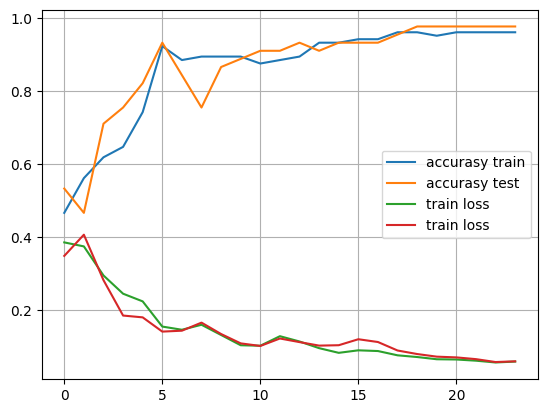

In [ ]:
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()

## Visualizacion after

In [ ]:
from drive.MyDrive.Notebook_tesis_def.dll.main_fun import _test

<Figure size 500x500 with 0 Axes>

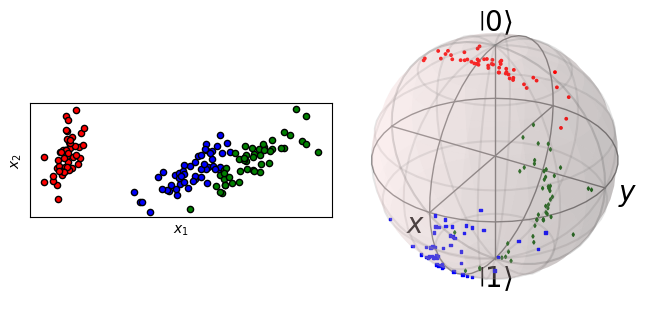

In [ ]:
# Propuesta para mostrar con mas puntos como esta prediciendo la red.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
X, y =  make_IRIS_v2(2,3)
X = np.hstack((X, np.zeros((X.shape[0], 1), requires_grad=False)))
# paramters_1q, bias_1q
state_labels = representatives(3, 1)
predicted_test, fidel_test = _test(qcircuit_1_qubit_mixed, paramters_1q, X, y, state_labels, bias_1q)
plot_data_v2(X, predicted_test, fig, ax1)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
S = 3*np.ones((len(y)))
visualization_1_qubit(qcircuit_1_qubit, X, y,paramters_1q, ax2, sz=S, bias=bias_1q)
#ax2.set_box_aspect([1, 1, 1])
# paramters_1q, bias_1q
# def visualization_1_qubit(f_q_circuit, X, Y, params, ax, angles=[-90,180], sz=1, bias=None, entanglement=False):

plt.show()

## Visualizacion before

<Figure size 500x500 with 0 Axes>

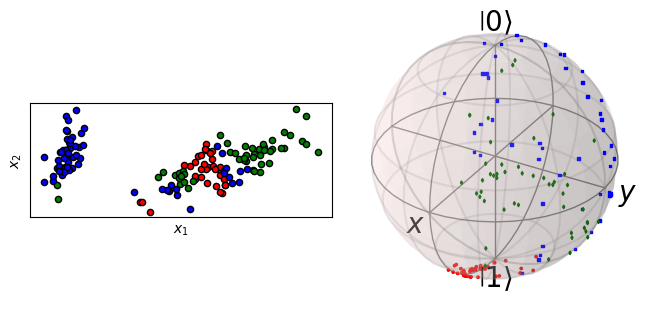

In [ ]:
# Propuesta para mostrar con mas puntos como esta prediciendo la red.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


np.random.seed(model.ramdom_state)
# initialize random weights
params = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(model.n_qubits*model.num_layers, 3), requires_grad=True)

fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
X, y =  make_IRIS_v2(2,3)
X = np.hstack((X, np.zeros((X.shape[0], 1), requires_grad=False)))
# paramters_1q, bias_1q
state_labels = representatives(3, 1)
predicted_test, fidel_test = _test(qcircuit_1_qubit_mixed, params, X, y, state_labels, bias)
plot_data_v2(X, predicted_test, fig, ax1)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
S = 3*np.ones((len(y)))
visualization_1_qubit(qcircuit_1_qubit, X, y, params, ax2, sz=S, bias=bias)
#ax2.set_box_aspect([1, 1, 1])
# paramters_1q, bias_1q
# def visualization_1_qubit(f_q_circuit, X, Y, params, ax, angles=[-90,180], sz=1, bias=None, entanglement=False):

plt.show()

# Prueba 2 qubits

In [ ]:
X, y =  make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 2, alpha_noise = 0.0)
paramters_2q, bias_2q = model.fit(X, y)

Epoch: 100%|██████████| 8/8 [11:58<00:00, 89.85s/it]


In [ ]:
model.save_states(model.X_train, model.y_train, "file.json")

[-0.18962247 -0.68028676  0.        ]


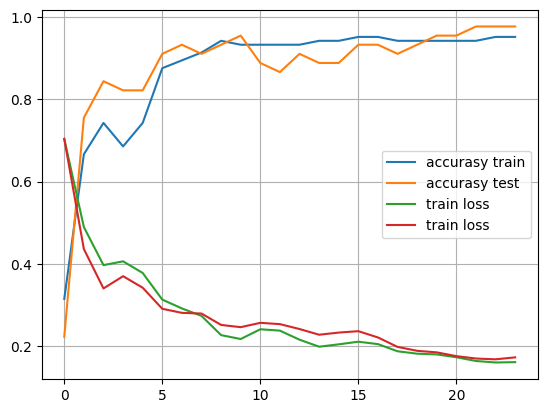

In [ ]:
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()

In [ ]:
predicted_test = model.test(model.X_val,model.y_val)

In [ ]:
model_after = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 2, alpha_noise = 0.0)

In [ ]:
predicted_test_after = model_after.test(model.X_val,model.y_val)

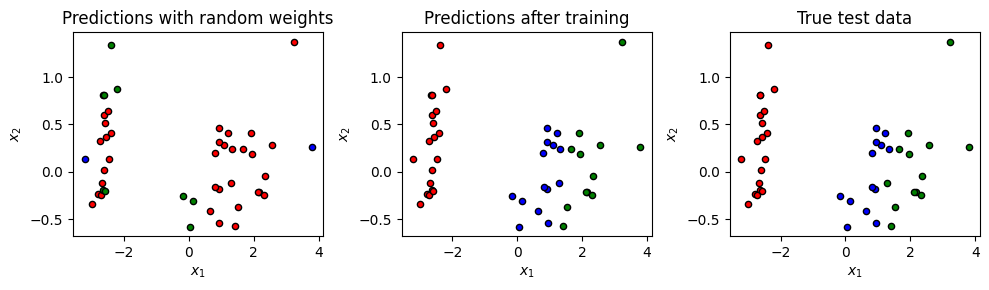

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data_v2(model.X_val, predicted_test_after , fig, axes[0])
plot_data_v2(model.X_val, predicted_test, fig, axes[1])
plot_data_v2(model.X_val, model.y_val, fig, axes[2])
axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

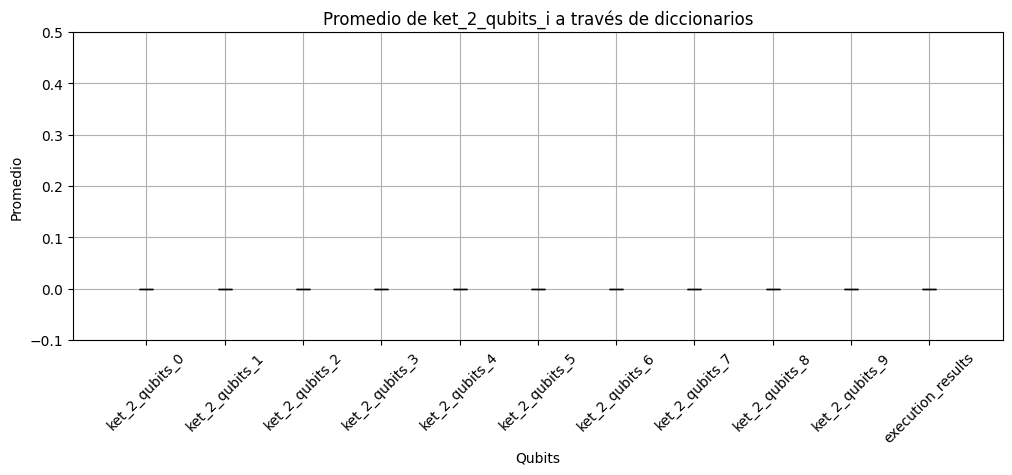

In [ ]:
plot_concurrence('file.json')

# Prueba 2 qubits con entrelazamiento

In [ ]:
X, y =  make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, entanglement = True)
paramters_2q_ent, bias_2q_ent = model.fit(X, y)

Epoch: 100%|██████████| 8/8 [13:20<00:00, 100.03s/it]


In [ ]:
model.save_states(model.X_train, model.y_train, "file.json")

[-0.18962247 -0.68028676  0.        ]


In [ ]:
from qutip import concurrence

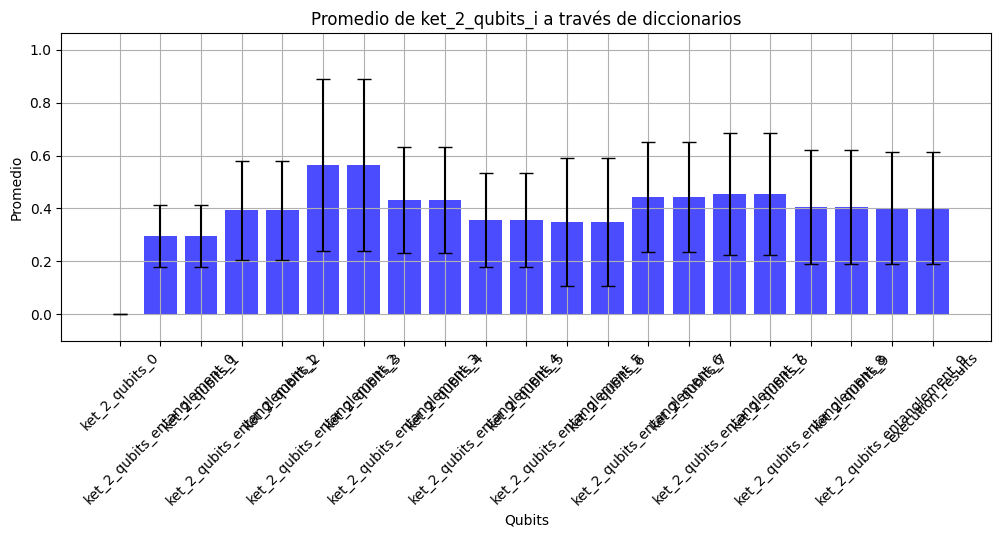

In [ ]:
before, dict_samples_before_1_qubit = w_r_json('r',"file.json")
import statistics
N_states_bl = len(dict_samples_before_1_qubit)
dict_states_fidelities = []
for i in range(N_states_bl):
    dict_bl = dict_samples_before_1_qubit[i]
    Fidelities_by_state = {}
    for key in dict_bl:
        state_bl_i = dict_bl[key].numpy()
        state_bl_i  = Qobj(state_bl_i)
        state_bl_i.dims = [[2, 2], [2, 2]]
        e = concurrence(state_bl_i)
        Fidelities_by_state[key] = e
    dict_states_fidelities.append(Fidelities_by_state)

ket_labels = list(dict_states_fidelities[0].keys())
  #if entanglement == True and model.n_qubits == 2:
  #  ket_labels_e = []
  #  for i in range(len(dict_states_fidelities[0])):
  #    ket_labels_e.append()
promedios = {ket: [] for ket in ket_labels}

for diccionario in dict_states_fidelities:
    for ket, valor in diccionario.items():
        promedios[ket].append(valor)

  # Calcular el promedio para cada 'ket_1_qubit_i'
promedios_mean = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}
promedios_desviacion = {key: statistics.stdev(values) for key, values in promedios.items()}
# Crear el diagrama de barras
plt.figure(figsize=(12, 4))
plt.grid()
plt.bar(promedios_mean.keys(), promedios_mean.values(), yerr=list(promedios_desviacion.values()), capsize=5, color='blue', alpha=0.7)
plt.xlabel('Qubits')
plt.ylabel('Promedio')
plt.title(f'Promedio de ket_{model.n_qubits}_qubits_i a través de diccionarios')
plt.xticks(rotation=45)
plt.ylim(min(promedios_mean.values()) - 0.1, max(promedios_mean.values()) + 0.5)
plt.show()

# Prueba con 4 qubits

Epoch: 100%|██████████| 8/8 [23:09<00:00, 173.70s/it]


[-0.18962247 -0.68028676  0.        ]


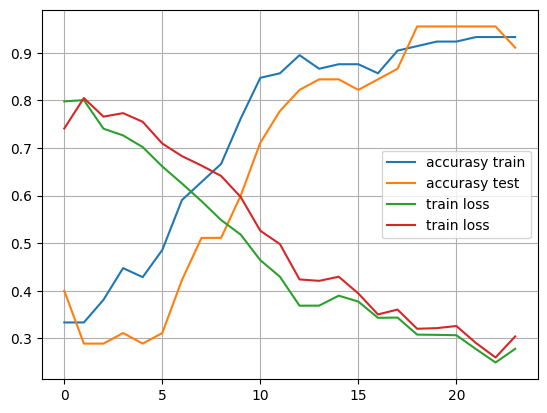

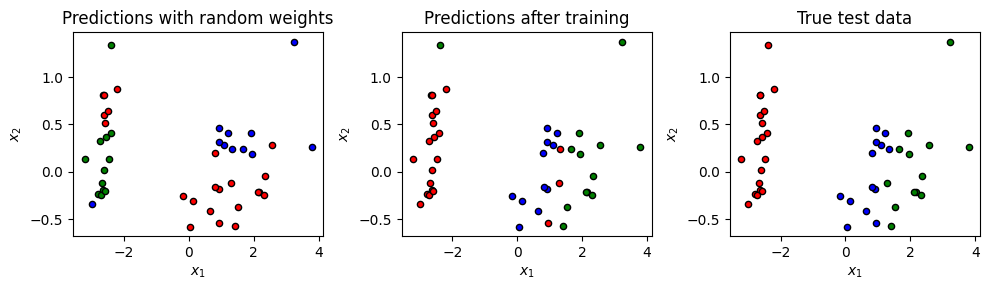

ValueError: dimension mismatch

In [ ]:
X, y =  make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, entanglement = False)
paramters_4q, bias_4q = model.fit(X, y)

model.save_states(model.X_train, model.y_train, "file.json")

plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()

predicted_test = model.test(model.X_val,model.y_val)


model_after = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 4,
                   features = 2, alpha_noise = 0.0)

predicted_test_after = model_after.test(model.X_val,model.y_val)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data_v2(model.X_val, predicted_test_after , fig, axes[0])
plot_data_v2(model.X_val, predicted_test, fig, axes[1])
plot_data_v2(model.X_val, model.y_val, fig, axes[2])
axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()


plot_concurrence('file.json')

# Pruebas definitivas 2 y 4 qubits

## 2 qubits - sin entrelazamiento

In [7]:
# Circles
X, y = circle(200)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False)
paramters_2_1_1, bias_2_1_1 = model.fit(X, y)

Epoch: 100%|██████████| 8/8 [02:12<00:00, 16.61s/it]


In [8]:
print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Acc train = 0.7857142857142857
Acc test= 0.65
Loss train = 0.3673610356048966


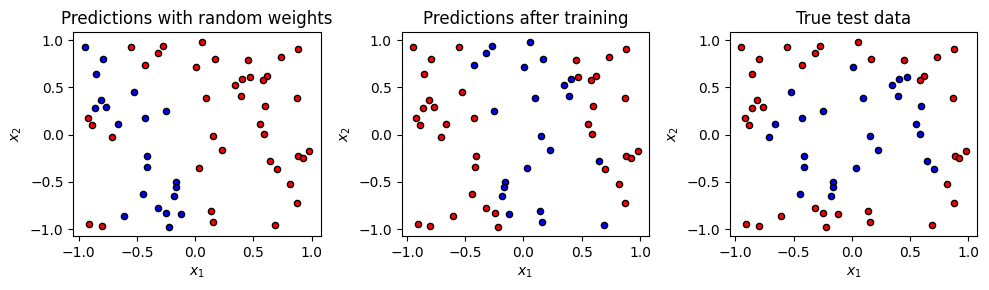

In [9]:
predicted_test = model.test(model.X_val,model.y_val)

model_after = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False)

predicted_test_after = model_after.test(model.X_val,model.y_val)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data_v2(model.X_val, predicted_test_after , fig, axes[0])
plot_data_v2(model.X_val, predicted_test, fig, axes[1])
plot_data_v2(model.X_val, model.y_val, fig, axes[2])
axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()


In [10]:
# Two Moons
X, y = make_moons(n_samples=300, noise=0.3, random_state=0)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False)
paramters_2_1_2, bias_2_1_2 = model.fit(X, y)

Epoch: 100%|██████████| 8/8 [03:19<00:00, 24.88s/it]


In [11]:
print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Acc train = 0.8952380952380953
Acc test= 0.9222222222222223
Loss train = 0.2572785125381242


In [12]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(2,3)
X, y = make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False)
paramters_2_1_3, bias_2_1_3 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [01:39<00:00, 12.42s/it]


Acc train = 0.9523809523809523
Acc test= 0.9777777777777777
Loss train = 0.16025416204090084


In [14]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,2)
X, y = make_IRIS_v2(3,2)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 3, alpha_noise = 0.0, save_process = False)
paramters_2_1_4, bias_2_1_4 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [01:06<00:00,  8.32s/it]


Acc train = 1.0
Acc test= 1.0
Loss train = 0.1107175052279381


In [15]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,2)
X, y = make_IRIS_v2(3,3)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 3, alpha_noise = 0.0, save_process = False)
paramters_2_1_5, bias_2_1_5 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [01:38<00:00, 12.32s/it]


Acc train = 0.9523809523809523
Acc test= 1.0
Loss train = 0.14446821557142261


## 2 qubits - con entrelazamiento

In [17]:
# Circles

X, y = circle(200)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_2_1, bias_2_2_1 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [02:19<00:00, 17.45s/it]


Acc train = 0.8571428571428571
Acc test= 0.7666666666666667
Loss train = 0.2620008804529767


In [18]:
# Two Moons

X, y = make_moons(n_samples=300, noise=0.3, random_state=0)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_2_2, bias_2_2_2 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [03:32<00:00, 26.50s/it]


Acc train = 0.9285714285714286
Acc test= 0.9
Loss train = 0.17250478432766933


In [19]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(2,3)
X, y = make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_3_3, bias_2_3_3 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [01:45<00:00, 13.15s/it]


Acc train = 0.9619047619047619
Acc test= 1.0
Loss train = 0.16318024812145324


In [20]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,2)
X, y = make_IRIS_v2(3,2)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 2,
                   features = 3, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_3_4, bias_2_3_4 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [01:10<00:00,  8.77s/it]


Acc train = 0.9857142857142858
Acc test= 1.0
Loss train = 0.2069572504903754


In [21]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,3)
X, y = make_IRIS_v2(3,3)
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 2,
                   features = 3, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_3_5, bias_2_3_5 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [01:43<00:00, 13.00s/it]


Acc train = 0.9714285714285714
Acc test= 1.0
Loss train = 0.17496244000878836


## 4 qubits sin entrelazamiento

In [4]:
# Circles

X, y = circle(200)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = False)
paramters_2_2_1, bias_2_2_1 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [04:30<00:00, 33.86s/it]


Acc train = 0.9142857142857143
Acc test= 0.8333333333333334
Loss train = 0.20855464122255366


In [5]:
# Two Moons

X, y = make_moons(n_samples=300, noise=0.3, random_state=0)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = False)
paramters_2_2_2, bias_2_2_2 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [06:45<00:00, 50.65s/it]


Acc train = 0.9380952380952381
Acc test= 0.9222222222222223
Loss train = 0.1550280675347233


In [6]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(2,3)
X, y = make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = False)
paramters_2_3_3, bias_2_3_3 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [03:20<00:00, 25.11s/it]


Acc train = 0.9333333333333333
Acc test= 0.9111111111111111
Loss train = 0.2778986089291284


In [7]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,2)
X, y = make_IRIS_v2(3,2)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 4,
                   features = 3, alpha_noise = 0.0, save_process = False, entanglement = False)
paramters_2_3_4, bias_2_3_4 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [02:14<00:00, 16.79s/it]


Acc train = 0.9857142857142858
Acc test= 0.9666666666666667
Loss train = 0.12582688444029894


In [8]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,3)
X, y = make_IRIS_v2(3,3)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 4,
                   features = 3, alpha_noise = 0.0, save_process = False, entanglement = False)
paramters_2_3_5, bias_2_3_5 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [03:23<00:00, 25.49s/it]


Acc train = 0.9714285714285714
Acc test= 1.0
Loss train = 0.19958763376590835


## 4 qubits con entrelazamiento

In [9]:
# Circles

X, y = circle(200)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_2_1, bias_2_2_1 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [04:44<00:00, 35.60s/it]


Acc train = 0.8857142857142857
Acc test= 0.8166666666666667
Loss train = 0.22626877189613537


In [10]:
# Two Moons

X, y = make_moons(n_samples=300, noise=0.3, random_state=0)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_2_2, bias_2_2_2 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [07:13<00:00, 54.14s/it]


Acc train = 0.9095238095238095
Acc test= 0.9222222222222223
Loss train = 0.18478846784038436


In [11]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(2,3)
X, y = make_IRIS_v2(2,3)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 4,
                   features = 2, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_3_3, bias_2_3_3 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [03:45<00:00, 28.16s/it]


Acc train = 0.9523809523809523
Acc test= 0.9333333333333333
Loss train = 0.23943426509838778


In [12]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,2)
X, y = make_IRIS_v2(3,2)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 2, n_qubits = 4,
                   features = 3, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_3_4, bias_2_3_4 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [02:19<00:00, 17.46s/it]


Acc train = 1.0
Acc test= 0.9333333333333333
Loss train = 0.13127958873467496


In [13]:
# make_IRIS_v2(n_comp, n_classes)
# Iris(3,3)
X, y = make_IRIS_v2(3,3)
model = Modelo_DRU(qcircuit_4_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 4,
                   features = 3, alpha_noise = 0.0, save_process = False, entanglement = True)
paramters_2_3_5, bias_2_3_5 = model.fit(X, y)

print(f"Acc train = {model.acc_train[-1]}")
print(f"Acc test= {model.acc_test[-1]}")
print(f"Loss train = {model.loss_list_train[-1]}")

Epoch: 100%|██████████| 8/8 [03:34<00:00, 26.81s/it]


Acc train = 0.9619047619047619
Acc test= 0.9777777777777777
Loss train = 0.1697677522930926
